In [17]:
import warnings
warnings.filterwarnings("ignore")

In [20]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

In [2]:
data = pd.read_parquet('data/full_data.parquet')
data.head(10)

,rtctime,lat,lon,target_temperature,feature_c,feature_ct,feature_motorspeed,ambient_temp,car_speed,soc
0,1672911588170,68.860123,18.346718,-4.281718,20.947325,-1.0,68.902439,-3.9,1.05,84.199997
1,1672911588180,68.860123,18.346718,-4.281718,20.947325,-1.0,68.902439,-3.9,1.05,84.199997
2,1672911588190,68.860123,18.346718,-4.281718,20.947325,-1.0,68.902439,-3.9,1.05,84.199997
3,1672911588200,68.860123,18.346718,-4.281718,21.361129,-1.0,70.731707,-3.9,1.05,84.199997
4,1672911588210,68.860123,18.346718,-4.281718,21.361129,-1.0,70.731707,-3.9,1.11,84.199997
5,1672911588220,68.860123,18.346718,-4.281718,21.361129,-1.0,70.731707,-3.9,1.11,84.199997
6,1672911588230,68.860123,18.346718,-4.281718,21.361129,-1.0,70.731707,-3.9,1.11,84.199997
7,1672911588240,68.860123,18.346718,-4.281718,21.361129,-1.0,70.731707,-3.9,1.11,84.199997
8,1672911588250,68.860123,18.346718,-4.281718,20.629015,-1.0,72.560976,-3.9,1.17,84.199997
9,1672911588260,68.860123,18.346718,-4.281718,20.629015,-1.0,72.560976,-3.9,1.17,84.199997


In [3]:
data = data.reset_index()
data.drop(['index'],1,inplace=True)
print('Before removing duplicates data shape: ',data.shape)
data = data.drop_duplicates(subset = ['rtctime'], keep = 'first')
print('After removing duplicates data shape: ',data.shape)
data = data.sort_values(by = 'rtctime', ascending = True)
data = data.reset_index()
data.drop(['index'],1,inplace=True)
data.head(10)

Before removing duplicates data shape:  (8159719, 10)
After removing duplicates data shape:  (8156409, 10)


,rtctime,lat,lon,target_temperature,feature_c,feature_ct,feature_motorspeed,ambient_temp,car_speed,soc
0,1672911588170,68.860123,18.346718,-4.281718,20.947325,-1.0,68.902439,-3.9,1.05,84.199997
1,1672911588180,68.860123,18.346718,-4.281718,20.947325,-1.0,68.902439,-3.9,1.05,84.199997
2,1672911588190,68.860123,18.346718,-4.281718,20.947325,-1.0,68.902439,-3.9,1.05,84.199997
3,1672911588200,68.860123,18.346718,-4.281718,21.361129,-1.0,70.731707,-3.9,1.05,84.199997
4,1672911588210,68.860123,18.346718,-4.281718,21.361129,-1.0,70.731707,-3.9,1.11,84.199997
5,1672911588220,68.860123,18.346718,-4.281718,21.361129,-1.0,70.731707,-3.9,1.11,84.199997
6,1672911588230,68.860123,18.346718,-4.281718,21.361129,-1.0,70.731707,-3.9,1.11,84.199997
7,1672911588240,68.860123,18.346718,-4.281718,21.361129,-1.0,70.731707,-3.9,1.11,84.199997
8,1672911588250,68.860123,18.346718,-4.281718,20.629015,-1.0,72.560976,-3.9,1.17,84.199997
9,1672911588260,68.860123,18.346718,-4.281718,20.629015,-1.0,72.560976,-3.9,1.17,84.199997


In [4]:
data = data.drop(['lat','lon'],1)
data.columns

Index(['rtctime', 'target_temperature', 'feature_c', 'feature_ct',
       'feature_motorspeed', 'ambient_temp', 'car_speed', 'soc'],
      dtype='object')

In [5]:
copy_data = data.copy()

In [6]:
data_diff = data.rolling(window=7, min_periods=7).mean()
data_diff = data_diff[7:]
data_diff.head(10)

,rtctime,target_temperature,feature_c,feature_ct,feature_motorspeed,ambient_temp,car_speed,soc
7,1.672912e+12,-4.281718,21.242899,-1.0,70.209059,-3.9,1.084286,84.199997
8,1.672912e+12,-4.281718,21.197426,-1.0,70.731707,-3.9,1.101429,84.199997
9,1.672912e+12,-4.281718,21.151953,-1.0,71.254355,-3.9,1.118571,84.199997
10,1.672912e+12,-4.281718,21.047366,-1.0,71.515679,-3.9,1.135714,84.199997
11,1.672912e+12,-4.281718,20.942778,-1.0,71.777003,-3.9,1.144286,84.199997
12,1.672912e+12,-4.281718,20.838190,-1.0,72.038328,-3.9,1.160000,84.199997
13,1.672912e+12,-4.281718,20.783623,-1.0,72.560976,-3.9,1.175714,84.199997
14,1.672912e+12,-4.281718,20.729055,-1.0,73.083624,-3.9,1.191429,84.199997
15,1.672912e+12,-4.281718,20.779076,-1.0,73.344948,-3.9,1.198571,84.199997
16,1.672912e+12,-4.281718,20.829096,-1.0,73.606272,-3.9,1.212857,84.199997


In [7]:
data_diff = data_diff.reset_index()

In [8]:
scaling_data = data.drop(['rtctime'],1)
# scaling_data.drop(['index'],1,inplace=True)
std_sc = StandardScaler()
scaled_data = std_sc.fit_transform(scaling_data)
scaled_data

array([[-1.86297842,  0.67255378, -0.63751442, ...,  0.77050431,
        -2.23972402,  1.45092095],
       [-1.86297842,  0.67255378, -0.63751442, ...,  0.77050431,
        -2.23972402,  1.45092095],
       [-1.86297842,  0.67255378, -0.63751442, ...,  0.77050431,
        -2.23972402,  1.45092095],
       ...,
       [ 1.02767153, -0.97479533,  0.93907854, ...,  0.80128753,
         0.45293845, -0.3807295 ],
       [ 1.02767153, -0.97479533,  0.93907854, ...,  0.83207068,
         0.45293845, -0.3807295 ],
       [ 1.02767153, -0.97479533,  0.93907854, ...,  0.83207068,
         0.45293845, -0.3807295 ]])

In [9]:
scaled_df = pd.DataFrame(scaled_data, columns = ['target_temperature','feature_c','feature_ct','feature_motorspeed','ambient_temp','car_speed','soc'])
scaled_df

,target_temperature,feature_c,feature_ct,feature_motorspeed,ambient_temp,car_speed,soc
0,-1.862978,0.672554,-0.637514,-2.222623,0.770504,-2.239724,1.450921
1,-1.862978,0.672554,-0.637514,-2.222623,0.770504,-2.239724,1.450921
2,-1.862978,0.672554,-0.637514,-2.222623,0.770504,-2.239724,1.450921
3,-1.862978,0.724158,-0.637514,-2.221151,0.770504,-2.239724,1.450921
4,-1.862978,0.724158,-0.637514,-2.221151,0.770504,-2.237214,1.450921
...,...,...,...,...,...,...,...
8156404,1.027672,-0.974795,0.939079,0.446759,0.832071,0.452938,-0.380730
8156405,1.027672,-0.974795,0.939079,0.446759,0.801288,0.452938,-0.380730
8156406,1.027672,-0.974795,0.939079,0.446759,0.801288,0.452938,-0.380730
8156407,1.027672,-0.974795,0.939079,0.446759,0.832071,0.452938,-0.380730


In [10]:
time_df = data['rtctime']
time_df = pd.DataFrame(time_df)
time_df = time_df.reset_index()
time_df.drop(['index'],1,inplace=True)
merged_df = pd.concat([time_df, scaled_df], axis=1)
merged_df

,rtctime,target_temperature,feature_c,feature_ct,feature_motorspeed,ambient_temp,car_speed,soc
0,1672911588170,-1.862978,0.672554,-0.637514,-2.222623,0.770504,-2.239724,1.450921
1,1672911588180,-1.862978,0.672554,-0.637514,-2.222623,0.770504,-2.239724,1.450921
2,1672911588190,-1.862978,0.672554,-0.637514,-2.222623,0.770504,-2.239724,1.450921
3,1672911588200,-1.862978,0.724158,-0.637514,-2.221151,0.770504,-2.239724,1.450921
4,1672911588210,-1.862978,0.724158,-0.637514,-2.221151,0.770504,-2.237214,1.450921
...,...,...,...,...,...,...,...,...
8156404,1673371992330,1.027672,-0.974795,0.939079,0.446759,0.832071,0.452938,-0.380730
8156405,1673371992340,1.027672,-0.974795,0.939079,0.446759,0.801288,0.452938,-0.380730
8156406,1673371992350,1.027672,-0.974795,0.939079,0.446759,0.801288,0.452938,-0.380730
8156407,1673371992360,1.027672,-0.974795,0.939079,0.446759,0.832071,0.452938,-0.380730


In [11]:
X = merged_df.drop(['target_temperature'],1)
y = merged_df['target_temperature']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5709486, 7) (2446923, 7) (5709486,) (2446923,)


In [17]:
# def split_sequence(df_t : pd.DataFrame, pred: pd.DataFrame, n_steps : int) -> np.array:

#     sequences = []
#     target = []

#     for i in tqdm.trange(len(df_t) - n_steps):
#         sequences.append(df_t[i : (i+n_steps)])
#         target.append(pred[i+n_steps : (i+n_steps)+1].values)

#     sequences = np.asarray(sequences, dtype=np.float16)              
#     target = np.asarray(target, dtype=np.int8)       

#     return sequences, target

# train_X, train_y = split_sequence(X_train, y_train, 7)
# train_X.shape, train_y.shape

In [13]:
X_train.drop(['rtctime'],1,inplace=True)
X_test.drop(['rtctime'],1,inplace=True)

In [14]:
# X_train = np.array(X_train)
# X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
# X_test = np.array(X_test)
# X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

X_train.shape, X_test.shape

((5709486, 6), (2446923, 6))

In [15]:
model_lstm = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(8, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'relu')
])

model_lstm.compile(loss = 'mean_squared_error', optimizer = 'sgd')
model_lstm.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                224       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 497
Trainable params: 497
Non-trainable params: 0
_________________________________________________________________


In [16]:
history = model_lstm.fit(X_train, y_train, epochs = 10, batch_size = 210)

Epoch 1/10
5709486/5709486 [==============================] - 40s 7us/sample - loss: 0.5891
Epoch 2/10
5709486/5709486 [==============================] - 38s 7us/sample - loss: 0.5760
Epoch 3/10
5709486/5709486 [==============================] - 39s 7us/sample - loss: 0.5706
Epoch 4/10
5709486/5709486 [==============================] - 40s 7us/sample - loss: 0.5670
Epoch 5/10
5709486/5709486 [==============================] - 39s 7us/sample - loss: 0.5650
Epoch 6/10
5709486/5709486 [==============================] - 39s 7us/sample - loss: 0.5639
Epoch 7/10
5709486/5709486 [==============================] - 42s 7us/sample - loss: 0.5631
Epoch 8/10
5709486/5709486 [==============================] - 39s 7us/sample - loss: 0.5625
Epoch 9/10
5709486/5709486 [==============================] - 39s 7us/sample - loss: 0.5617
Epoch 10/10
5709486/5709486 [==============================] - 37s 6us/sample - loss: 0.5611


In [19]:
y_pred = model_lstm.predict(X_test)
print(np.round(r2_score(y_test, y_pred),2))

0.44


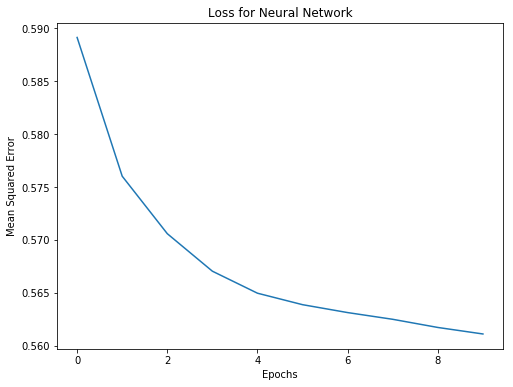

In [28]:
plt.figure(figsize=(8,6))
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.title("Loss for Neural Network")
plt.show()